# One Line plotting

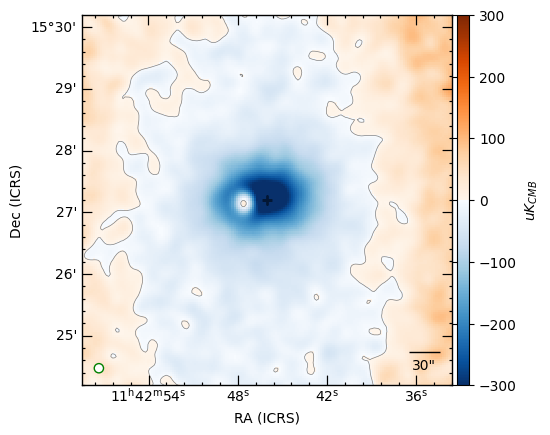

In [1]:
from witch.plotting import plot_cluster, plot_cluster_act

from matplotlib import pyplot as plt

fits_path = "/mnt/welch/USERS/jorlo/Reductions/MOOJ1142/ea10-ps_gauss/dx_1-dy_1-r_1-theta-P0-m500-dx_g-dy_g-amp_g/signal/niter_1_25.fits"
img_m2 = plot_cluster("MOOJ1142", fits_path, radius = 3.0, smooth = 3, ncontours=21, plot_r = False, units = "uK_cmb")
plt.savefig("../plts/mooj1142_m2.png", dpi=300)
plt.savefig("../plts/mooj1142_m2.pdf", dpi=300)

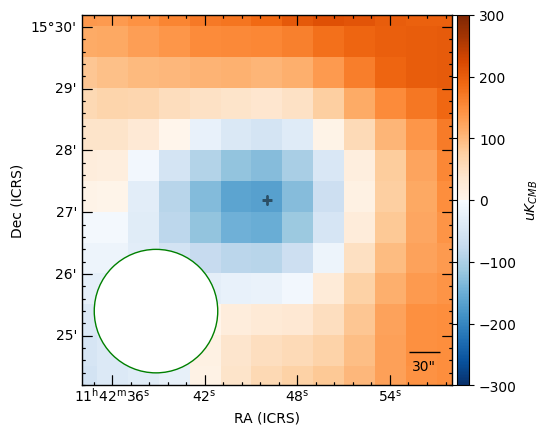

In [2]:
fits_path = "/mnt/welch/USERS/jorlo/maps/20240323_simple/mooj1142_test.fits"
cfg_path = "/mnt/welch/USERS/jorlo/Reductions/MOOJ1142/ea10-ps_gauss/dx_1-dy_1-r_1-theta-P0-m500-dx_g-dy_g-amp_g/config.yaml"

img = plot_cluster_act("MOOJ1142", fits_path, cfg_path, smooth=30, radius = 3.0, plot_r = False, units = "uK", bound = 300)
plt.savefig("../plts/mooj1142_act.png", dpi=300)
plt.savefig("../plts/mooj1142_act.pdf", dpi=300)

# Stuff to clean up

In [6]:
import aplpy
import pyparsing
import pyregion
import astropy
#import pyfits
import matplotlib.pyplot as pyplot
import numpy as np

%load_ext autoreload
%autoreload 2

In [7]:
#dmimgcalc infile=MS0735_first_map_precon_mpi_EigSmooth_rebinpowers_model_files0-284_bunch5.fits op="imgout=img1*1.22*1000000" \out="MS0735_first_map_precon_mpi_EigSmooth_rebinpowers_model_files0-284_bunch5_muK.fits" mode=h

import platform; plat = platform.system()
import matplotlib; 
if plat == "Darwin":
    print("using MacOSX for matplotlib backend")
    matplotlib.use('MacOSX')
#else:
#    print("using TkAgg for matplotlib backend")
#    matplotlib.use('TkAgg')


/tmp/ipykernel_936096/2754027575.py:20: UserWarning: Trying to register the cmap 'mymap' which already exists.
  cm.register_cmap('mymap', cmap = ListedColormap(newcolors))


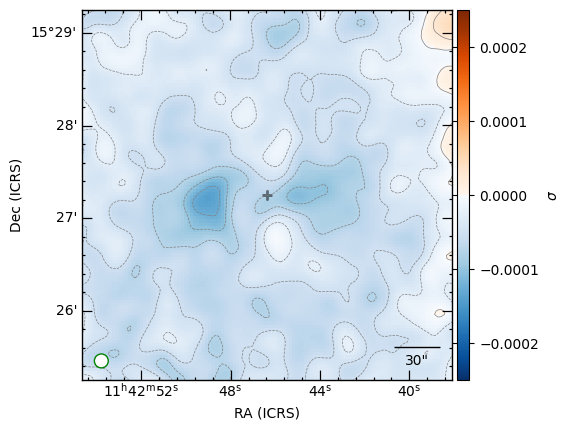

In [8]:
cluster = "/mnt/welch/USERS/jorlo/Reductions/MOOJ1142/ea10-ps_gauss/dx_1-dy_1-r_1-theta-P0-m500-dx_g-dy_g-amp_g/residual/niter_1_25.fits"
fig = pyplot.figure(figsize=(5, 5))
img = aplpy.FITSFigure(cluster, hdu=0, figure=fig, downsample=1, smooth=False, convention='calabretta')
img.set_theme('publication')

# cmaps: plasma, viridis, magma, inferno, jet, gnuplot, gnuplot2, gist_earth, afmhot, gist_heat, gist_hist, gist_rainbow, nipy_spectral, cubehelix
#cmap = 'gnuplot'
#cmap = 'jet_r'
#cmap = 'inferno'
#cmap = 'PuOr_r'

## blue-orange colormap:
import matplotlib.cm as cm

bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),bottom(np.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('mymap', cmap = ListedColormap(newcolors))
cmap = 'mymap'
#######

bound = 2.5e-4


#img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax)
smooth=3
img.show_colorscale(cmap=cmap,stretch='linear',vmin=-bound,vmax=bound,smooth=smooth) # if you want to smooth

# in degrees
ra, dec = np.rad2deg([3.06642436, 0.26972541])
img.recenter(ra, dec, radius=2.0/60.0)

#img.tick_labels.show()
#img.tick_labels.set_xformat('hh:mm:ss.ss')
#img.tick_labels.set_yformat('dd:mm:ss.s')
img.ax.tick_params(axis='both',which='both',direction='in')

matplotlib.rcParams['lines.linewidth'] = 3.0
img.add_scalebar(0.5/60.0, '30\"', color='black')

matplotlib.rcParams['lines.linewidth'] = 2.0

img.add_beam(major=9.0/3600.0, minor=9.0/3600.0, angle=0)
img.beam.set_color('white')
img.beam.set_edgecolor('green')
img.beam.set_facecolor('white')
img.beam.set_corner('bottom left')


img.show_markers(ra, dec, facecolor='black', edgecolor=None,
                marker='+', s=50, linewidths=2, alpha = 0.5)


img.add_colorbar('right')
img.colorbar.set_width(0.12)
img.colorbar.set_axis_label_text('$\sigma$')

matplotlib.rcParams['lines.linewidth'] = 0.5

clevels= np.linspace(-bound, bound, 21)
img.show_contour(cluster,colors="gray",levels=clevels, returnlevels=True,convention='calabretta',smooth=3)

#img.add_label(0.5, 1.05, 'MS0735.6+7421', relative=True, size='large', layer='title')

img.save('../plts/test.pdf'.format(smooth),dpi=600)

In [9]:
from astropy.convolution import convolve, Gaussian2DKernel
smooth = 3 
kernel = Gaussian2DKernel(x_stddev=smooth)
img._data = convolve(img._data, kernel)


In [10]:
#Residual plot, old bubble
#cluster = '/scratch/r/rbond/jorlo/Reductions/MS0735/isobeta/amp_1_amp_2_sup_sup_amp/beta1_r1_r3_pred/beta1_r1_r3_pred_sn.fits'


n=2
#Presmoothed
#cluster = '/scratch/r/rbond/jorlo/Reductions/MS0735/isobeta/amp_1_amp_2_sup_sup_amp/beta1_r1_r3_pred/beta1_r1_r3_pred_sn_{}_smooth.fits'.format(n)

#with shock
cluster = '/project/r/rbond/jorlo/Reductions/data/shock_data_r1_sn_{}_smooth.fits'.format(n)
#cluster = "/scratch/r/rbond/jorlo/Reductions/RXJ1347/a10/RXJ1347_A10/dx_1-dy_1-m500-dx_g-dy_g-amp_g/niter_1_25.fits"
fig = pyplot.figure(figsize=(5, 5))
img = aplpy.FITSFigure(cluster, hdu=0, figure=fig, downsample=1, smooth=False, convention='calabretta')
img.set_theme('publication')

# cmaps: plasma, viridis, magma, inferno, jet, gnuplot, gnuplot2, gist_earth, afmhot, gist_heat, gist_hist, gist_rainbow, nipy_spectral, cubehelix
#cmap = 'gnuplot'
#cmap = 'jet_r'
#cmap = 'inferno'
#cmap = 'PuOr_r'

## blue-orange colormap:
import matplotlib.cm as cm

bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)
newcolors = numpy.vstack((top(numpy.linspace(0, 1, 128)),bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('OrangeBlue', cmap = ListedColormap(newcolors))
cmap = 'OrangeBlue'
#######

vmin=-3
vmax=+3

img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax)
#img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=3) # if you want to smooth

# in degrees
#img.recenter(115.71, 74.243, radius=3.0/60.0)

img.recenter(115.43509, 74.24449, radius=2.0/60.0)

#img.tick_labels.show()
#img.tick_labels.set_xformat('hh:mm:ss.ss')
#img.tick_labels.set_yformat('dd:mm:ss.s')
img.ax.tick_params(axis='both',which='both',direction='in')

matplotlib.rcParams['lines.linewidth'] = 3.0
img.add_scalebar(0.5/60.0, '30\"', color='black')

matplotlib.rcParams['lines.linewidth'] = 2.0

img.add_beam(major=9.0/3600.0, minor=9.0/3600.0, angle=0)
img.beam.set_color('white')
img.beam.set_edgecolor('green')
img.beam.set_facecolor('white')
img.beam.set_corner('bottom left')


img.show_markers(115.43509, 74.24449, edgecolor='black', facecolor='black',
                marker='+', s=50, linewidths=1, alpha = 0.5)

img.show_circles(115.43509+(60/3600), 74.24449+(43/3600), radius = 0.5/60, coords_frame  ='world', color='green')
img.show_circles(115.435092-(42/3600), 74.24449-(51/3600), radius = 0.5/60, coords_frame  ='world', color='green')
#img.show_circles(115.435092-(60/3600), 74.59, radius = 0.5/60, coords_frame  ='world', color='green')



img.add_colorbar('right')
img.colorbar.set_width(0.12)
img.colorbar.set_axis_label_text('$\sigma$')

matplotlib.rcParams['lines.linewidth'] = 0.5

#clevels=[-250e-6, -200e-6, -150e-6, -100e-6, -50e-6, 0, 50e-6, 100e-6, 150e-6, 200e-6, 250e-6]
#clevels=[-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250]
clevels = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
img.show_contour(cluster,colors="gray",levels=clevels, returnlevels=True,convention='calabretta',smooth=3)

#img.add_label(0.5, 1.05, 'MS0735.6+7421', relative=True, size='large', layer='title')

#img.save('ms0735_resid_shock_r1_r3_pred_pub_{}_smooth.pdf'.format(n),dpi=600)

OSError: File not found: /project/r/rbond/jorlo/Reductions/data/shock_data_r1_sn_2_smooth.fits

<Figure size 500x500 with 0 Axes>

In [ ]:
#Data plot, old bubble
#cluster = '/scratch/r/rbond/jorlo/Reductions/MS0735/isobeta/amp_1_amp_2_sup_sup_amp/data_sn.fits'
#cluster = '/scratch/r/rbond/jorlo/Reductions/MS0735/isobeta/amp_1_amp_2_sup_sup_amp/data_sn.fits'

#Pre-smoothed with 1pixel kernel
n = 2
cluster = '/project/r/rbond/jorlo/Reductions/data/data_sn_{}_smooth.fits'.format(n)

fig = pyplot.figure(figsize=(5, 5))
img = aplpy.FITSFigure(cluster, hdu=0, figure=fig, downsample=1, smooth=False, convention='calabretta')
img.set_theme('publication')

# cmaps: plasma, viridis, magma, inferno, jet, gnuplot, gnuplot2, gist_earth, afmhot, gist_heat, gist_hist, gist_rainbow, nipy_spectral, cubehelix
#cmap = 'gnuplot'
#cmap = 'jet_r'
#cmap = 'inferno'
#cmap = 'PuOr_r'

## blue-orange colormap:
import matplotlib.cm as cm

bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)
newcolors = numpy.vstack((top(numpy.linspace(0, 1, 128)),bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('OrangeBlue', cmap = ListedColormap(newcolors))
cmap = 'OrangeBlue'
#######

vmin=-3 # for microK
vmax=+3

#img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=5)
#img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=3) # if you want to smooth
img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax)

# in degrees
#img.recenter(115.71, 74.243, radius=3.0/60.0)
img.recenter(115.43509, 74.24449, radius=6.0/60.0)

#img.tick_labels.show()
#img.tick_labels.set_xformat('hh:mm:ss.ss')
#img.tick_labels.set_yformat('dd:mm:ss.s')
img.ax.tick_params(axis='both',which='both',direction='in')

matplotlib.rcParams['lines.linewidth'] = 3.0
img.add_scalebar(0.5/60.0, '30\"', color='black')

matplotlib.rcParams['lines.linewidth'] = 2.0

img.add_beam(major=9.0/3600.0, minor=9.0/3600.0, angle=0)
img.beam.set_color('white')
img.beam.set_edgecolor('green')
img.beam.set_facecolor('white')
img.beam.set_corner('bottom left')


img.show_markers(115.43509, 74.24449, edgecolor='black', facecolor='black',
                marker='+', s=50, linewidths=1, alpha = 0.5)

img.show_circles(115.43509+(60/3600), 74.24449+(43/3600), radius = 0.5/60, coords_frame  ='world', color='green')
img.show_circles(115.435092-(42/3600), 74.24449-(51/3600), radius = 0.5/60, coords_frame  ='world', color='green')
#img.show_circles(115.435092-(60/3600), 74.59, radius = 0.5/60, coords_frame  ='world', color='green')



img.add_colorbar('right')
img.colorbar.set_width(0.12)
img.colorbar.set_axis_label_text('$\sigma$')

matplotlib.rcParams['lines.linewidth'] = 0.5

#clevels=[-250e-6, -200e-6, -150e-6, -100e-6, -50e-6, 0, 50e-6, 100e-6, 150e-6, 200e-6, 250e-6]
#clevels=[-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250]
clevels = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
img.show_contour(cluster,colors="gray",levels=clevels, returnlevels=True,convention='calabretta',smooth=3)

#img.add_label(0.5, 1.05, 'MS0735.6+7421', relative=True, size='large', layer='title')

img.save('ms0735_data_beta1_r1_r3_pred_pub_{}_smooth.pdf'.format(n),dpi=600)

In [ ]:
#Model plot, old bubble
#cluster = '/scratch/r/rbond/jorlo/Reductions/MS0735/isobeta/amp_1_amp_2_sup_sup_amp/data_sn.fits'
#cluster = '/scratch/r/rbond/jorlo/Reductions/MS0735/isobeta/amp_1_amp_2_sup_sup_amp/data_sn.fits'

#Pre-smoothed with 1pixel kernel

cluster = '/project/r/rbond/jorlo/Reductions/data/shock_data_r1_model.fits'

fig = pyplot.figure(figsize=(5, 5))
img = aplpy.FITSFigure(cluster, hdu=0, figure=fig, downsample=1, smooth=False, convention='calabretta')
img.set_theme('publication')

# cmaps: plasma, viridis, magma, inferno, jet, gnuplot, gnuplot2, gist_earth, afmhot, gist_heat, gist_hist, gist_rainbow, nipy_spectral, cubehelix
#cmap = 'gnuplot'
#cmap = 'jet_r'
#cmap = 'inferno'
#cmap = 'PuOr_r'

## blue-orange colormap:
import matplotlib.cm as cm

#bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)
newcolors = numpy.vstack((top(numpy.linspace(0, 1, 128))))#,bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('model', cmap = ListedColormap(newcolors))
cmap = 'model'
#######

vmin=-3 # for microK
vmax=+3


img.show_colorscale(cmap=cmap,stretch='linear', vmin = -1.1e-1, vmax = 0)
#img.show_colorscale(cmap=cmap,stretch='linear')

# in degrees
#img.recenter(115.71, 74.243, radius=3.0/60.0)
img.recenter(115.43509, 74.24449, radius=2.0/60.0)

#img.tick_labels.show()
#img.tick_labels.set_xformat('hh:mm:ss.ss')
#img.tick_labels.set_yformat('dd:mm:ss.s')
img.ax.tick_params(axis='both',which='both',direction='in')

matplotlib.rcParams['lines.linewidth'] = 3.0
img.add_scalebar(0.5/60.0, '30\"', color='black')

matplotlib.rcParams['lines.linewidth'] = 2.0

img.add_beam(major=9.0/3600.0, minor=9.0/3600.0, angle=0)
img.beam.set_color('white')
img.beam.set_edgecolor('green')
img.beam.set_facecolor('white')
img.beam.set_corner('bottom left')


img.show_markers(115.43509, 74.24449, edgecolor='black', facecolor='black',
                marker='+', s=50, linewidths=1, alpha = 0.5)

img.show_circles(115.43509+(60/3600), 74.24449+(43/3600), radius = 0.5/60, coords_frame  ='world', color='green')
img.show_circles(115.435092-(42/3600), 74.24449-(51/3600), radius = 0.5/60, coords_frame  ='world', color='green')
#img.show_circles(115.435092-(60/3600), 74.59, radius = 0.5/60, coords_frame  ='world', color='green')



img.add_colorbar('right')
img.colorbar.set_width(0.12)
img.colorbar.set_axis_label_text('mJy/beam')

matplotlib.rcParams['lines.linewidth'] = 0.5

#clevels=[-250e-6, -200e-6, -150e-6, -100e-6, -50e-6, 0, 50e-6, 100e-6, 150e-6, 200e-6, 250e-6]
#clevels=[-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250]
clevels = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
#img.show_contour(cluster,colors="gray",levels=clevels, returnlevels=True,convention='calabretta',smooth=3)

#img.add_label(0.5, 1.05, 'MS0735.6+7421', relative=True, size='large', layer='title')

img.save('ms0735_data_beta1_r1_r3_model_pub.pdf',dpi=600)

In [ ]:
#Residual plot, old bubble
cluster = '/gpfs/fs0/scratch/r/rbond/jorlo/Reductions/MS0735/isobeta/amp_1_amp_2_sup_sup_amp/r1_r3_pred_newbub/r1_r3_pred_newbub_sn.fits'

fig = pyplot.figure(figsize=(5, 5))
img = aplpy.FITSFigure(cluster, hdu=0, figure=fig, downsample=1, smooth=False, convention='calabretta')
img.set_theme('publication')

# cmaps: plasma, viridis, magma, inferno, jet, gnuplot, gnuplot2, gist_earth, afmhot, gist_heat, gist_hist, gist_rainbow, nipy_spectral, cubehelix
#cmap = 'gnuplot'
#cmap = 'jet_r'
#cmap = 'inferno'
#cmap = 'PuOr_r'

## blue-orange colormap:
import matplotlib.cm as cm

bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)
newcolors = numpy.vstack((top(numpy.linspace(0, 1, 128)),bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('OrangeBlue', cmap = ListedColormap(newcolors))
cmap = 'OrangeBlue'
#######

vmin=-5 # for microK
vmax=+5

img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=9)
#img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=3) # if you want to smooth

# in degrees
#img.recenter(115.71, 74.243, radius=3.0/60.0)
img.recenter(115.43509, 74.24449, radius=2.0/60.0)

#img.tick_labels.show()
#img.tick_labels.set_xformat('hh:mm:ss.ss')
#img.tick_labels.set_yformat('dd:mm:ss.s')
img.ax.tick_params(axis='both',which='both',direction='in')

matplotlib.rcParams['lines.linewidth'] = 3.0
img.add_scalebar(0.5/60.0, '30\"', color='black')

matplotlib.rcParams['lines.linewidth'] = 2.0

img.add_beam(major=9.0/3600.0, minor=9.0/3600.0, angle=0)
img.beam.set_color('white')
img.beam.set_edgecolor('green')
img.beam.set_facecolor('white')
img.beam.set_corner('bottom left')


img.show_markers(115.43509, 74.24449, edgecolor='black', facecolor='black',
                marker='+', s=50, linewidths=1, alpha = 0.5)

img.show_circles(115.43509+(25/3600), 74.24449+(48/3600), radius = 0.5/60, coords_frame  ='world', color='green')
img.show_circles(115.435092-(21/3600), 74.24449-(51/3600), radius = 0.5/60, coords_frame  ='world', color='green')
#img.show_circles(115.435092-(60/3600), 74.59, radius = 0.5/60, coords_frame  ='world', color='green')



img.add_colorbar('right')
img.colorbar.set_width(0.12)
img.colorbar.set_axis_label_text('$\sigma$')

matplotlib.rcParams['lines.linewidth'] = 0.5

#clevels=[-250e-6, -200e-6, -150e-6, -100e-6, -50e-6, 0, 50e-6, 100e-6, 150e-6, 200e-6, 250e-6]
#clevels=[-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250]
clevels = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
img.show_contour(cluster,colors="gray",levels=clevels, returnlevels=True,convention='calabretta',smooth=3)

#img.add_label(0.5, 1.05, 'MS0735.6+7421', relative=True, size='large', layer='title')

img.save('ms0735_resid_r1_r3_pred_newbub_pub.pdf',dpi=600)

In [ ]:
#Data plot, old bubble

cluster = '/scratch/r/rbond/jorlo/Reductions/MS0735/isobeta/amp_1_amp_2_sup_sup_amp/data_sn.fits'

fig = pyplot.figure(figsize=(5, 5))
img = aplpy.FITSFigure(cluster, hdu=0, figure=fig, downsample=1, smooth=False, convention='calabretta')
img.set_theme('publication')

# cmaps: plasma, viridis, magma, inferno, jet, gnuplot, gnuplot2, gist_earth, afmhot, gist_heat, gist_hist, gist_rainbow, nipy_spectral, cubehelix
#cmap = 'gnuplot'
#cmap = 'jet_r'
#cmap = 'inferno'
#cmap = 'PuOr_r'

## blue-orange colormap:
import matplotlib.cm as cm

bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)
newcolors = numpy.vstack((top(numpy.linspace(0, 1, 128)),bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('OrangeBlue', cmap = ListedColormap(newcolors))
cmap = 'OrangeBlue'
#######

vmin=-5 # for microK
vmax=+5

img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=9)
#img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=3) # if you want to smooth

# in degrees
#img.recenter(115.71, 74.243, radius=3.0/60.0)
img.recenter(115.43509, 74.24449, radius=2.0/60.0)

#img.tick_labels.show()
#img.tick_labels.set_xformat('hh:mm:ss.ss')
#img.tick_labels.set_yformat('dd:mm:ss.s')
img.ax.tick_params(axis='both',which='both',direction='in')

matplotlib.rcParams['lines.linewidth'] = 3.0
img.add_scalebar(0.5/60.0, '30\"', color='black')

matplotlib.rcParams['lines.linewidth'] = 2.0

img.add_beam(major=9.0/3600.0, minor=9.0/3600.0, angle=0)
img.beam.set_color('white')
img.beam.set_edgecolor('green')
img.beam.set_facecolor('white')
img.beam.set_corner('bottom left')


img.show_markers(115.43509, 74.24449, edgecolor='black', facecolor='black',
                marker='+', s=50, linewidths=1, alpha = 0.5)

img.show_circles(115.43509+(25/3600), 74.24449+(48/3600), radius = 0.5/60, coords_frame  ='world', color='green')
img.show_circles(115.435092-(21/3600), 74.24449-(51/3600), radius = 0.5/60, coords_frame  ='world', color='green')
#img.show_circles(115.435092-(60/3600), 74.59, radius = 0.5/60, coords_frame  ='world', color='green')



img.add_colorbar('right')
img.colorbar.set_width(0.12)
img.colorbar.set_axis_label_text('$\sigma$')

matplotlib.rcParams['lines.linewidth'] = 0.5

#clevels=[-250e-6, -200e-6, -150e-6, -100e-6, -50e-6, 0, 50e-6, 100e-6, 150e-6, 200e-6, 250e-6]
#clevels=[-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250]
clevels = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
img.show_contour(cluster,colors="gray",levels=clevels, returnlevels=True,convention='calabretta',smooth=3)

#img.add_label(0.5, 1.05, 'MS0735.6+7421', relative=True, size='large', layer='title')

img.save('ms0735_data_beta1_r1_r3_pred_newbub_pub.pdf',dpi=600)

In [ ]:
#Residual plot, r1=r3, todsub
cluster = '/scratch/r/rbond/jorlo/Reductions/MS0735/isobeta/amp_1_amp_2_sup_sup_amp/r1_r3_pred/r1_r3_pred_sn.fits'

fig = pyplot.figure(figsize=(5, 5))
img = aplpy.FITSFigure(cluster, hdu=0, figure=fig, downsample=1, smooth=False, convention='calabretta')
img.set_theme('publication')

# cmaps: plasma, viridis, magma, inferno, jet, gnuplot, gnuplot2, gist_earth, afmhot, gist_heat, gist_hist, gist_rainbow, nipy_spectral, cubehelix
#cmap = 'gnuplot'
#cmap = 'jet_r'
#cmap = 'inferno'
#cmap = 'PuOr_r'

## blue-orange colormap:
import matplotlib.cm as cm

bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)
newcolors = numpy.vstack((top(numpy.linspace(0, 1, 128)),bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('OrangeBlue', cmap = ListedColormap(newcolors))
cmap = 'OrangeBlue'
#######

vmin=-3
vmax=+3

img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=9)
#img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=3) # if you want to smooth

# in degrees
#img.recenter(115.71, 74.243, radius=3.0/60.0)
img.recenter(115.43509, 74.24449, radius=2.0/60.0)

#img.tick_labels.show()
#img.tick_labels.set_xformat('hh:mm:ss.ss')
#img.tick_labels.set_yformat('dd:mm:ss.s')
img.ax.tick_params(axis='both',which='both',direction='in')

matplotlib.rcParams['lines.linewidth'] = 3.0
img.add_scalebar(0.5/60.0, '30\"', color='black')

matplotlib.rcParams['lines.linewidth'] = 2.0

img.add_beam(major=9.0/3600.0, minor=9.0/3600.0, angle=0)
img.beam.set_color('white')
img.beam.set_edgecolor('green')
img.beam.set_facecolor('white')
img.beam.set_corner('bottom left')


img.show_markers(115.43509, 74.24449, edgecolor='black', facecolor='black',
                marker='+', s=50, linewidths=1, alpha = 0.5)

img.show_circles(115.43509+(15/3600), 74.24449+(43/3600), radius = 0.5/60, coords_frame  ='world', color='green')
img.show_circles(115.435092-(60/3600), 74.24449-(51/3600), radius = 0.5/60, coords_frame  ='world', color='green')
#img.show_circles(115.435092-(60/3600), 74.59, radius = 0.5/60, coords_frame  ='world', color='green')



img.add_colorbar('right')
img.colorbar.set_width(0.12)
img.colorbar.set_axis_label_text('$\sigma$')

matplotlib.rcParams['lines.linewidth'] = 0.5

#clevels=[-250e-6, -200e-6, -150e-6, -100e-6, -50e-6, 0, 50e-6, 100e-6, 150e-6, 200e-6, 250e-6]
#clevels=[-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250]
clevels = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
img.show_contour(cluster,colors="gray",levels=clevels, returnlevels=True,convention='calabretta',smooth=3)

#img.add_label(0.5, 1.05, 'MS0735.6+7421', relative=True, size='large', layer='title')

img.save('ms0735_resid_r1_r3_pred_pub.pdf',dpi=600)

In [ ]:
#Residual plot, r1=r3, beta fit, no todsub
cluster = '/scratch/r/rbond/jorlo/Reductions/MS0735/isobeta/amp_1_amp_2_sup_sup_amp/beta1_r1_r3_no_pred/beta1_r1_r3_no_pred_sn.fits'

fig = pyplot.figure(figsize=(5, 5))
img = aplpy.FITSFigure(cluster, hdu=0, figure=fig, downsample=1, smooth=False, convention='calabretta')
img.set_theme('publication')

# cmaps: plasma, viridis, magma, inferno, jet, gnuplot, gnuplot2, gist_earth, afmhot, gist_heat, gist_hist, gist_rainbow, nipy_spectral, cubehelix
#cmap = 'gnuplot'
#cmap = 'jet_r'
#cmap = 'inferno'
#cmap = 'PuOr_r'

## blue-orange colormap:
import matplotlib.cm as cm

bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),bottom(mp.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('OrangeBlue', cmap = ListedColormap(newcolors))
cmap = 'OrangeBlue'
#######

vmin=-3
vmax=+3

img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=9)
#img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=3) # if you want to smooth

# in degrees
#img.recenter(115.71, 74.243, radius=3.0/60.0)
img.recenter(115.43509, 74.24449, radius=2.0/60.0)

#img.tick_labels.show()
#img.tick_labels.set_xformat('hh:mm:ss.ss')
#img.tick_labels.set_yformat('dd:mm:ss.s')
img.ax.tick_params(axis='both',which='both',direction='in')

matplotlib.rcParams['lines.linewidth'] = 3.0
img.add_scalebar(0.5/60.0, '30\"', color='black')

matplotlib.rcParams['lines.linewidth'] = 2.0

img.add_beam(major=9.0/3600.0, minor=9.0/3600.0, angle=0)
img.beam.set_color('white')
img.beam.set_edgecolor('green')
img.beam.set_facecolor('white')
img.beam.set_corner('bottom left')


img.show_markers(115.43509, 74.24449, edgecolor='black', facecolor='black',
                marker='+', s=50, linewidths=1, alpha = 0.5)

img.show_circles(115.43509+(15/3600), 74.24449+(43/3600), radius = 0.5/60, coords_frame  ='world', color='green')
img.show_circles(115.435092-(60/3600), 74.24449-(51/3600), radius = 0.5/60, coords_frame  ='world', color='green')
#img.show_circles(115.435092-(60/3600), 74.59, radius = 0.5/60, coords_frame  ='world', color='green')



img.add_colorbar('right')
img.colorbar.set_width(0.12)
img.colorbar.set_axis_label_text('$\sigma$')

matplotlib.rcParams['lines.linewidth'] = 0.5

#clevels=[-250e-6, -200e-6, -150e-6, -100e-6, -50e-6, 0, 50e-6, 100e-6, 150e-6, 200e-6, 250e-6]
#clevels=[-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250]
clevels = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
img.show_contour(cluster,colors="gray",levels=clevels, returnlevels=True,convention='calabretta',smooth=3)

#img.add_label(0.5, 1.05, 'MS0735.6+7421', relative=True, size='large', layer='title')

img.save('ms0735_resid_beta_r1_r3_no_pred_pub.pdf',dpi=600)

In [ ]:
#Residual plot, r1=r3, beta fit, todsub, double ra
cluster = '/gpfs/fs0/scratch/r/rbond/jorlo/Reductions/MS0735/isobeta/amp_1_amp_2_sup_sup_amp/r1_r3_pred_double_ra/r1_r3_pred_bub_doublera_sn.fits'

fig = pyplot.figure(figsize=(5, 5))
img = aplpy.FITSFigure(cluster, hdu=0, figure=fig, downsample=1, smooth=False, convention='calabretta')
img.set_theme('publication')

# cmaps: plasma, viridis, magma, inferno, jet, gnuplot, gnuplot2, gist_earth, afmhot, gist_heat, gist_hist, gist_rainbow, nipy_spectral, cubehelix
#cmap = 'gnuplot'
#cmap = 'jet_r'
#cmap = 'inferno'
#cmap = 'PuOr_r'

## blue-orange colormap:
import matplotlib.cm as cm

bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),bottom(np.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('OrangeBlue', cmap = ListedColormap(newcolors))
cmap = 'OrangeBlue'
#######

vmin=-2
vmax=+2

img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax,smooth=3) # if you want to smooth

# in degrees
#img.recenter(115.71, 74.243, radius=3.0/60.0)
img.recenter(115.43509, 74.24449, radius=2.0/60.0)

#img.tick_labels.show()
#img.tick_labels.set_xformat('hh:mm:ss.ss')
#img.tick_labels.set_yformat('dd:mm:ss.s')
img.ax.tick_params(axis='both',which='both',direction='in')

matplotlib.rcParams['lines.linewidth'] = 3.0
img.add_scalebar(0.5/60.0, '30\"', color='black')

matplotlib.rcParams['lines.linewidth'] = 2.0

img.add_beam(major=9.0/3600.0, minor=9.0/3600.0, angle=0)
img.beam.set_color('white')
img.beam.set_edgecolor('green')
img.beam.set_facecolor('white')
img.beam.set_corner('bottom left')


img.show_markers(115.43509, 74.24449, edgecolor='black', facecolor='black',
                marker='+', s=50, linewidths=1, alpha = 0.5)

img.show_circles(115.43509+(60/3600), 74.24449+(43/3600), radius = 0.5/60, coords_frame  ='world', color='green')
img.show_circles(115.435092-(42/3600), 74.24449-(51/3600), radius = 0.5/60, coords_frame  ='world', color='green')
#img.show_circles(115.435092-(60/3600), 74.59, radius = 0.5/60, coords_frame  ='world', color='green')



img.add_colorbar('right')
img.colorbar.set_width(0.12)
img.colorbar.set_axis_label_text('$\sigma$')

matplotlib.rcParams['lines.linewidth'] = 0.5

#clevels=[-250e-6, -200e-6, -150e-6, -100e-6, -50e-6, 0, 50e-6, 100e-6, 150e-6, 200e-6, 250e-6]
#clevels=[-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250]
clevels = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
img.show_contour(cluster,colors="gray",levels=clevels, returnlevels=True,convention='calabretta',smooth=3)

#img.add_label(0.5, 1.05, 'MS0735.6+7421', relative=True, size='large', layer='title')

img.save('ms0735_resid_beta_r1_r3_pred_doublera_pub.pdf',dpi=600)

# MOO 1142